# 胎儿健康分类
使用CTG数据将胎儿的健康分为正常，可疑或病理性
## 数据描述
对胎儿健康进行分类，以防止儿童和产妇死亡。
降低儿童死亡率反映在联合国的若干可持续发展目标中，是人类进步的关键指标。联合国预计，到2030年，各国将结束可预防的5岁以下新生儿和儿童的死亡，所有国家都力争将5岁以下儿童的死亡率降低到至少每1000活产25人。
与儿童死亡率的概念平行的当然是孕产妇死亡率，其占妊娠和分娩期间和之后（截至2017年）的295 000例死亡。这些死亡中的绝大多数（94％）发生在资源贫乏的地区，大多数可以预防。
鉴于上述情况，心电图（CTG）是评估胎儿健康的一种简单且成本可承受的选择，允许医疗保健专业人员采取行动以预防儿童和孕产妇死亡。该设备本身通过发送超声波脉冲并读取其响应来工作，从而减轻了胎儿心率（FHR），胎儿运动，子宫收缩等方面的负担。
## 内容范围
该数据集包含从心电图检查中提取的2126条特征记录，然后由三名产科专家将其分类为3类：正常、疑似、病理性的。
创建一个多分类模型以将CTG功能分类为三种胎儿健康状态。

“train.csv”包含1767个数据，每个数据包含21个属性。最后一列“fetal_health”的值表示健康程度，为分类标签，其中“1”为正常，“2”为疑似，“3”为病例性的。
“test.csv”包含280个数据，你的目标是预测其结果。
“predict.csv”是需要将预测的结果放在此表中，然后上传。
要求：以报告（文档）的形式记录整个实验过程。
实验报告（文档）内应将过程分为以下几步：
1)	数据理解和清洗；
2)	特征提取和选择；
3)	构建模型进行训练；
4)	模型评估和预测。
要求每步都要有详细过程。
在数据理解和清洗中，要求将按属性进行数据分析，统计信息缺失情况，且以图表的形式对数据进行展示。
在特征提取和选择中，要求对清洗后的数据进行特征提取，选择合适的特征或使用降维作为模型训练的输入。
在模型构建中，要求选择合适的机器学习方法构建模型（可选择多种方法进行对比），输出在训练集上的准确率，要有训练过程。在此部分，要对使用的方法进行方法介绍。（以SVM为例，要阐述SVM的基本原理、算法流程、目标函数等）。
在模型评估和预测中，要求使用预测数据集预测结果，将预测结果保存到predict.csv文件中。与真实标签对比，输出测试集上的准确率。
最终上传文件：报告（包含整个过程）、代码、csv文件（输出结果，形式如其真实标签类似，参考predict.csv）.
具体过程可参考：https://zhuanlan.zhihu.com/p/342552186
评分标准：以测试集上的分类准确率为这次考试的成绩。比如你的分类准确率为80%，你的代码成绩为80分。本次报告的最终成绩为：代码成绩*50%+报告*50%。



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   number                                                  1767 non-null   int64  
 1   baseline value                                          1767 non-null   int64  
 2   accelerations                                           1767 non-null   float64
 3   fetal_movement                                          1767 non-null   float64
 4   uterine_contractions                                    1767 non-null   float64
 5   light_decelerations                                     1767 non-null   float64
 6   severe_decelerations                                    1767 non-null   float64
 7   prolongued_decelerations                                1767 non-null   float64
 8   abnormal_short_term_variability       

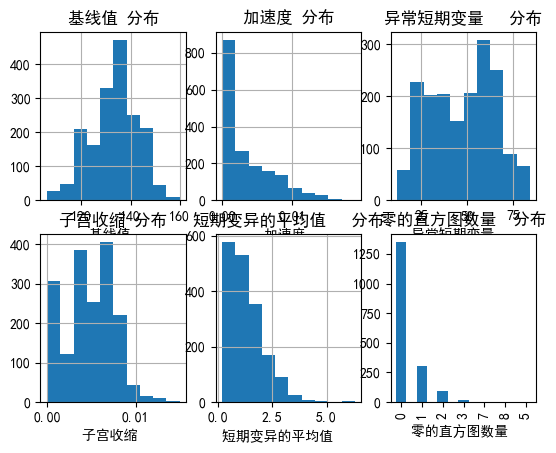

[[ 1.000e+00  1.350e+02  6.000e-03 ...  1.700e+01  1.000e+00  1.000e+00]
 [ 2.000e+00  1.410e+02  0.000e+00 ...  2.000e+00  1.000e+00  2.000e+00]
 [ 3.000e+00  1.330e+02  0.000e+00 ...  2.400e+01  1.000e+00  1.000e+00]
 ...
 [ 1.765e+03  1.270e+02  5.000e-03 ...  2.300e+01 -1.000e+00  1.000e+00]
 [ 1.766e+03  1.210e+02  0.000e+00 ...  9.800e+01 -1.000e+00  3.000e+00]
 [ 1.767e+03  1.310e+02  9.000e-03 ...  2.200e+01  1.000e+00  1.000e+00]]
[[ 30.77714531  17.20591814]
 [ -6.91335778   7.41134028]
 [ 22.35938782  -4.63325142]
 ...
 [ 65.61181812  50.97827792]
 [-63.24476625 -11.11781966]
 [-40.36376831 -69.10732935]]


TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.decomposition import PCA
import xlwt
import openpyxl as op
# 1、数据理解和清洗：
train_path = "../data/train.csv"
test_path = "../data/test.xlsx"
Data_train = pd.read_csv(train_path)
Data_test = pd.read_excel(test_path)

# 查看属性的数据量和缺失值情况：
print(Data_train.info())
print(Data_test.info())

# 查看各属性的基本信息：
pd.set_option('display.max_columns',None)
print(Data_train.describe())
print(Data_test.describe())

# 查看分类情况：
# 显示中文标题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
print(Data_train['fetal_health'].value_counts())
 # 绘图
fig = plt.figure()
# 基线值分布
plt.subplot2grid((2, 3), (0, 0))
Data_train['baseline value'].hist()
plt.xlabel(u'基线值 ')
plt.title(u'基线值 分布')
# 加速度分布
plt.subplot2grid((2, 3), (0, 1))
Data_train['accelerations'].hist()
plt.xlabel(u'加速度 ')
plt.title(u'加速度 分布')
# 异常短期变量
plt.subplot2grid((2, 3), (0, 2))
Data_train['abnormal_short_term_variability'].hist()
plt.xlabel(u'异常短期变量   ')
plt.title(u'异常短期变量   分布')
# 子宫收缩
plt.subplot2grid((2, 3), (1, 0))
Data_train['uterine_contractions'].hist()
plt.xlabel(u'子宫收缩 ')
plt.title(u'子宫收缩 分布')
# 短期变异的平均值
plt.subplot2grid((2, 3), (1, 1))
Data_train['mean_value_of_short_term_variability'].hist()
plt.xlabel(u'短期变异的平均值   ')
plt.title(u'短期变异的平均值   分布')
# 延长 减速
plt.subplot2grid((2, 3), (1, 2))
Data_train['histogram_number_of_zeroes'].value_counts().plot(kind='bar')
plt.xlabel(u'零的直方图数量 ')
plt.title(u'零的直方图数量  分布')
plt.show()

# 特征提取(降维)：
# 训练集：
y_train = np.array(Data_train)
y_train = np.mat(y_train)
y_train1 = y_train[:1000,22]
y_test1 = y_train[1000:,22]
y_train1 = np.array(y_train1)
print(y_train)
x_train = np.array(Data_train)
x_train1 = np.mat(x_train)
x_train1 = x_train[:1000,1:22]
x_test1 =  x_train[1000:,1:22]
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(x_train1)#得到了pca降到2维的数据
print(reduced_x)
# 测试集：
x_test = np.array(Data_test)
x_test = np.mat(x_test)
x_test = x_test[:,1:22]
pca = PCA(n_components=2)
reduced_test = pca.fit_transform(x_test)#得到了pca降到2维的数据
print(reduced_test)
# 训练集降维后的散点图
red_x, red_y = [], []
blue_x, blue_y = [], []
grenn_x, green_y = [], []
for i in range(len(reduced_x)):
    if y_train1[i] ==1:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y_train1[i] ==2:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    elif y_train1[i] ==3:
        grenn_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
plt.scatter(red_x, red_y, c='r', marker='o')
plt.scatter(blue_x, blue_y, c='b', marker='x')
plt.scatter(grenn_x, green_y, c='g', marker='^')
plt.show()

# SVM分类器参数设置
clf = svm.SVC(C=1,  # 误差项惩罚系数,默认值是1
                  kernel='linear',  # 线性核
                  decision_function_shape='ovr')  # 决策函数

# 模型训练
def train(clf, x_train, y_train):
    clf.fit(x_train,  # 训练集特征向量
            y_train.ravel())  # 训练集目标值

# 训练SVM模型
train(clf, x_train1, y_train1)

# 输出准确率
# 训练集：
print('trianing prediction:%.3f' %(clf.score(x_train1, y_train1)))
print('trianing_test prediction:%.3f' %(clf.score(x_test1, y_test1)))
test_predict = clf.predict(x_test)
print(test_predict)
print((clf.predict(x_test)==1).sum())
print((clf.predict(x_test)==2).sum())
print((clf.predict(x_test)==3).sum())

# 将预测结果写入到指定excel中
workbook = xlwt.Workbook(encoding='utf-8')
bg = op.load_workbook(r"../data/predict.xlsx")
sheet = bg["Sheet1"]
for i in range(len(test_predict)):
    sheet.cell(i+2,2,test_predict[i])
bg.save(r"../data/predict.xlsx")

